In [4]:
import preprocessing_ap
import scrapping_ap
import pandas as pd

Using TensorFlow backend.
C:\Users\Asma\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asma\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asma\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asma\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
cleaned=pd.read_csv(r'C:\Users\Asma\Desktop\internship\mycode\Volumes\Processing\CorpusFromWebSite_CleanedCorpus1.csv')

In [3]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 4 columns):
url         3814 non-null object
label       3814 non-null object
corpus      3814 non-null object
dateTime    3814 non-null object
dtypes: object(4)
memory usage: 119.3+ KB


In [25]:
df = pd.read_csv(r'C:\Users\Asma\Desktop\internship\mycode\Volumes\Processing\Url_Classification_com.csv')

In [23]:
df.isna().count()

url      7500
label    7500
dtype: int64

In [10]:
df_com=pd.read_csv(r'C:\Users\Asma\Desktop\internship\mycode\Volumes\Processing\df_com.csv')

In [11]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25806 entries, 0 to 25805
Data columns (total 2 columns):
url      25806 non-null object
label    25806 non-null object
dtypes: object(2)
memory usage: 403.3+ KB


In [7]:
df_com.columns=['index','url','label']

NameError: name 'df_com' is not defined

In [9]:
df_com=df_com[df_com['label']=='Adult']

In [10]:
df_com=df_com[df_com['url'].str.contains('.com')]

In [11]:
df_com.drop('index', 1, inplace=True)

In [12]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25806 entries, 2 to 35318
Data columns (total 2 columns):
url      25806 non-null object
label    25806 non-null object
dtypes: object(2)
memory usage: 604.8+ KB


In [13]:
df_com.to_csv('df_com.csv', index=False)

In [6]:
df_com=df_com.loc[:8000,:]

NameError: name 'df_com' is not defined

In [43]:
df=pd.read_csv(r'C:\Users\Asma\Desktop\internship\mycode\Volumes\Processing\CorpusFromWebSite_CleanedCorpus.csv')

FileNotFoundError: File b'C:\\Users\\Asma\\Desktop\\internship\\mycode\\Volumes\\Processing\\CorpusFromWebSite_CleanedCorpus.csv' does not exist

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 4 columns):
url         7814 non-null object
label       7814 non-null int64
corpus      7814 non-null object
dateTime    7814 non-null object
dtypes: int64(1), object(3)
memory usage: 244.3+ KB


In [ ]:
df.label.unique()

In [42]:
    valueCounts=df['label'].value_counts()
    df_train=df
    df_test=df
    for i,j in valueCounts.iteritems():
            train_size=int(df['label'].value_counts()[i]*0.8)
            print(train_size)
            df_aux=df[df['label']==i]
            df_train=df_train[df_train['label']!=i]
            df_test=df_test[df_test['label']!=i]
            df_train=pd.concat([df_aux.iloc[:int(valueCounts[i]*0.8),:],df_train])
            df_test=pd.concat([df_aux.iloc[int(valueCounts[i]*0.8):,:],df_test])

NameError: name 'df' is not defined

In [ ]:
def train_test_split_df(df):
    valueCounts=df['label'].value_counts()
    df_train=df
    df_test=df
    for i,j in valueCounts.iteritems():
            train_size=int(df['label'].value_counts()[i]*0.8)
            print(train_size)
            df_aux=df[df['label']==i]
            df_train=df_train[df_train['label']!=i]
            df_test=df_test[df_test['label']!=i]
            df_train=pd.concat([df_aux.iloc[:int(valueCounts[i]*0.8),:],df_train])
            df_test=pd.concat([df_aux.iloc[int(valueCounts[i]*0.8):,:],df_test])
    return df_train,df_test

In [41]:
df_train.to_csv('train_data.csv',index=False)

df_test.to_csv('test_data.csv',index=False)

NameError: name 'df_train' is not defined

In [39]:
def x_y_train_test(df_train,df_test):
    df_train['corpus']=df_train['corpus'].apply(eval).apply(listToString)
    df_test['corpus']=df_test['corpus'].apply(eval).apply(listToString)
    X_train=df_train['corpus'].values
    X_test=df_test['corpus'].values
    Y_train = np.asarray(df_train['label'].values).astype('float32')
    Y_test = np.asarray(df_test['label'].values).astype('float32')
    return X_train,X_test,Y_train,Y_test

In [40]:
df_train.label.value_counts()

NameError: name 'df_train' is not defined

In [ ]:
len(df_test.label.unique())

In [ ]:
int(df['label'].value_counts()['News']*0.8)

In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding , Bidirectional , GlobalMaxPool1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import text_to_word_sequence
import copy
import re
from nltk import WordNetLemmatizer

%matplotlib inline



In [4]:

df_train['corpus']=df_train['corpus'].apply(eval).apply(preprocessing_ap.listToString)
df_test['corpus']=df_test['corpus'].apply(eval).apply(preprocessing_ap.listToString)

NameError: name 'df_train' is not defined

In [ ]:
encoding_dict={k:v for v,k in enumerate(list(df_train.label.unique()))}

In [ ]:
encoding_dict

In [ ]:
def label_encoding(df)
    encoding_dict={k:v for v,k in enumerate(list(df.label.unique()))}
    import csv
    with open('encoding_dict.csv', 'w') as f:
        for key in encoding_dict.keys():
            f.write("%s,%s\n"%(key,encoding_dict[key]))
    df['label']=df['label'].map(encoding_dict)


In [38]:
df_test['label'].value_counts()

NameError: name 'df_test' is not defined

In [14]:
y_train

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [5]:
train=pd.read_csv(r'C:\Users\Asma\Desktop\internship\mycode\Volumes\Processing\train_data.csv')
test=pd.read_csv(r'C:\Users\Asma\Desktop\internship\mycode\Volumes\Processing\test_data.csv')

In [6]:
X_train=train['corpus'].values
X_test=test['corpus'].values

In [7]:
Y_train = np.asarray(train['label'].values).astype('float32')
Y_test = np.asarray(test['label'].values).astype('float32')

In [10]:
max_words = 2000
max_len = 150
#It is the process of separating each word in a text as a unit and you can later
#you use the tokenize data for things like term frequency and word clouds
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
#******************************
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [11]:
sequences_matrix

array([[1609,  757,  590, ..., 1609,  757,  590],
       [   0,    0,    0, ...,    0,    0, 1404],
       [   0,    0,    0, ..., 1882, 1042, 1994],
       ...,
       [ 747,  577,    9, ..., 1571,  198,   87],
       [1792, 1684,   90, ...,  117,   30,    3],
       [ 391,   73,  156, ...,  697,  346,  378]])

In [12]:
max_words = 2000
max_len = 150

In [13]:
def MyBaseline_Model(maxlen,max_features):
    #embed_size : number of dimensions
    embed_size = 128
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(LSTM(100, return_sequences=True))(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(100, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [40]:
model = MyBaseline_Model(max_len,max_words)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 128)          256000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 150, 200)          183200    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 200)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0   

In [41]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2
          #,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]
         )

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 5000 samples, validate on 1251 samples
Epoch 1/10
5000/5000 [==============================] - 29s 6ms/step - loss: 0.5509 - accuracy: 0.7296 - val_loss: 0.9049 - val_accuracy: 0.5044
Epoch 2/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.3456 - accuracy: 0.8498 - val_loss: 0.6698 - val_accuracy: 0.6427
Epoch 3/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.2911 - accuracy: 0.8752 - val_loss: 0.6295 - val_accuracy: 0.6771
Epoch 4/10
5000/5000 [==============================] - 29s 6ms/step - loss: 0.2602 - accuracy: 0.8882 - val_loss: 0.6799 - val_accuracy: 0.6251
Epoch 5/10
5000/5000 [==============================] - 29s 6ms/step - loss: 0.2370 - accuracy: 0.8980 - val_loss: 0.6813 - val_accuracy: 0.6819
Epoch 6/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.2189 - accuracy: 0.906

In [42]:
import matplotlib.pyplot as pyplot
from keras.callbacks import History 

In [43]:
# # list all data in history
# print(history.history.keys())
# summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

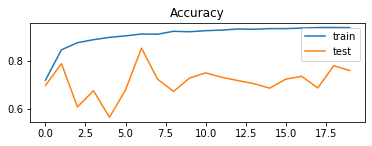

In [106]:
# # plot accuracy during training
# pyplot.subplot(212)
# pyplot.title('Accuracy')
# pyplot.plot(history.history['accuracy'], label='train')
# pyplot.plot(history.history['val_accuracy'], label='test')
# pyplot.legend()
# pyplot.show()

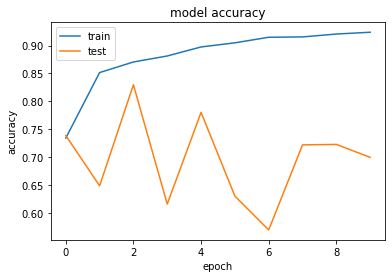

In [97]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
!pip install pydot

You should consider upgrading via the 'c:\users\asma\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [45]:
test_sequences_matrix

array([[ 664,  799, 1047, ...,  597,  935,   70],
       [   0,    0,    0, ...,  278,  258,  613],
       [   0,    0,    0, ...,  974,  974, 1137],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [  12,   14,  174, ...,  303,  224,  116],
       [ 789, 1994, 1162, ..., 1337,  357, 1677]])

In [46]:
accr = model.evaluate(test_sequences_matrix,Y_test)

1563/1563 [==============================] - 2s 1ms/step


In [47]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.476
  Accuracy: 0.824


In [48]:
predictions=model.predict(test_sequences_matrix)

In [25]:
predictions

array([[0.5009938 ],
       [0.5011471 ],
       [0.502644  ],
       ...,
       [0.499058  ],
       [0.49920923],
       [0.50126046]], dtype=float32)

In [49]:
predictions.shape

(1563, 1)

In [50]:
predictions=predictions.reshape(1563,)
predictions=list(map(lambda x: 1 if x > 0.5 else 0 , predictions))

In [25]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

In [51]:
plot_classification_report(classification_report(Y_test, predictions))

NameError: name 'plot_classification_report' is not defined

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82       800
         1.0       0.79      0.87      0.83       763

    accuracy                           0.82      1563
   macro avg       0.83      0.83      0.82      1563
weighted avg       0.83      0.82      0.82      1563



In [53]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

In [54]:
target_names = ['non_Adult', 'Adult']

In [55]:
clf_report = classification_report(Y_test,
                                   predictions,
                                   target_names=target_names,
                                   output_dict=True)

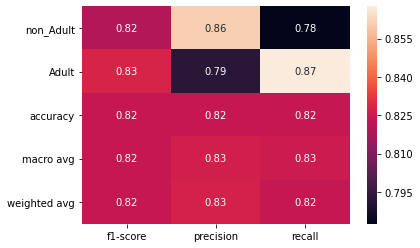

In [56]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [57]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, predictions)
print(cf_matrix)

[[626 174]
 [101 662]]


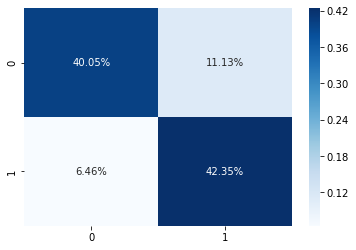

In [58]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

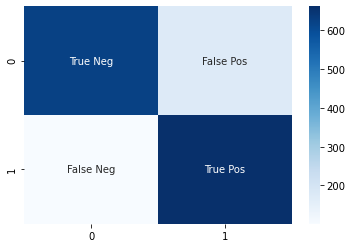

In [59]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [111]:
def predict_site(url,model):
    model.predict()

In [112]:
import scrapping_ap as sap
import preprocessing_ap as pap

In [113]:
# url="https://www.xvideos.com"
url="https://www.bbc.com/"
corpus=sap.scrap_raw_text(url)
corpus=pap.text_preprocessing(corpus)
tokenizer=pap.PatternTokenizer()
corpus=' '.join(corpus)
corpus=tokenizer.process_text(corpus)

scraping from https://www.bbc.com/


C:\Users\Asma\Desktop\internship\mycode\Volumes\Processing\scrapping_ap.py:24: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 24 of the file C:\Users\Asma\Desktop\internship\mycode\Volumes\Processing\scrapping_ap.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(page)


In [114]:
corpus=' '.join(corpus)

In [115]:
corpus

'html bbc homepage webapp wwhp international homepage start facebook instant article ownership verification end facebook instant article ownership verification environment live orbit c cc istats web module navid web module user activity helper web module cookiebanner web module searchbox web module navpromo web module lt ie iemobile site optimise modern web browser fully support version internet explorer endif bbc homepage bbcdotcom slot leaderboard england deputy chief medical officer say uk start take covid seriously bbcdotcom slot mpu condition lead putin critic alexei navalny improve german doctor treat white house insist tell book president lawyer lie maria kolesnikova woman join force oppose president lukashenko everton sign colombia attack midfielder james rodriguez real madrid deal worth ps m serena williams battle challenging set test greek th seed maria sakkari reach open quarter final phil foden mason greenwood leave england camp break covid quarantine guideline iceland say 

In [116]:
corpus=[corpus]


In [120]:
c = tok.texts_to_sequences(corpus)
c = sequence.pad_sequences(c,maxlen=max_len)

In [121]:
c

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [122]:
model.predict(c)

array([[0.72148293]], dtype=float32)

In [ ]:
import pandas as pd
import preprocessing_ap as pap 

In [ ]:
data=pd.read_csv('CorpusFromWebSite_CleanedCorpus1.csv')
data1=pd.read_csv('CorpusFromWebSite_CleanedCorpus.csv')

In [ ]:
data1=data1[data1['label']!='Adult']

In [ ]:
data1.label.unique()

In [ ]:
big_data=pd.concat([data1,data])

In [ ]:
big_data.label.value_counts()

In [ ]:
big_data['label']=big_data['label'].map(lambda x: 1 if x == 'Adult' else 0)

In [ ]:
big_data = big_data.sample(frac = 1) 


In [ ]:
df_aux=big_data[big_data['label']==0]
big_data=big_data[big_data['label']!=0]
big_data=pd.concat([df_aux.iloc[:4000,:],big_data])

In [ ]:
big_data.to_csv('CorpusFromWebSite_CleanedCorpus.csv',index=False)